<a href="https://colab.research.google.com/github/fralfaro/MAT281_20XX/blob/main/docs/lectures/machine_learning/reg_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressión II

## Regressión Múltiple


Los modelos de regresión multiple son los más utilizados en el mundo de machine learning, puestos que se dispone de varios característica de la población objetivo. A menudo, se estará abordando estos modelos de la perspectiva de los modelos lineales, por lo cual se debetener en mente algunos supuestos antes de comenzar:


* **No colinialidad o multicolinialidad**: En los modelos lineales múltiples los predictores deben ser independientes, no debe de haber colinialidad entre ellos
* **Parsimonia**: Este término hace referencia a que el mejor modelo es aquel capaz de explicar con mayor precisión la variabilidad observada en la variable respuesta empleando el menor número de predictores, por lo tanto, con menos asunciones.
* **Homocedasticidad**:La varianza de los residuos debe de ser constante en todo el rango de observaciones.
* **Otros Factores**:
    * **Distribución normal de los residuos**
    * **No autocorrelación (Independencia)**
    * **Valores atípicos, con alto leverage o influyentes**
    * **Tamaño de la muestra**
    
Por otro lado, existen otros tipos de modelos de regresión, en los cuales se  necesitan menos supuestos que los modelos de regresión lineal, a cambio se pierde un poco de interpretabilidad en sus parámetros y centran su atención en los resultados obtenidos de las predicciones.

## Aplicación con python

### Dataset  Boston house prices 

En este ejemplo se va utilizar el dataset **Boston** que ya viene junto con **sklearn** y es ideal para practicar con Regresiones Lineales; el mismo contiene precios de casas de varias áreas de la ciudad de Boston. 

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# sklearn models
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml

In [3]:
# Load the Boston Housing dataset using fetch_openml
data = fetch_openml(data_id=531)

# Create a DataFrame from the data
boston_df = pd.DataFrame(data.data, columns=data.feature_names)
boston_df['TARGET'] = data.target
boston_df = boston_df.astype(float)
boston_df.head()

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\db-connectors-RsEieBu8-py3.8\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# descripcion del conjunto de datos
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


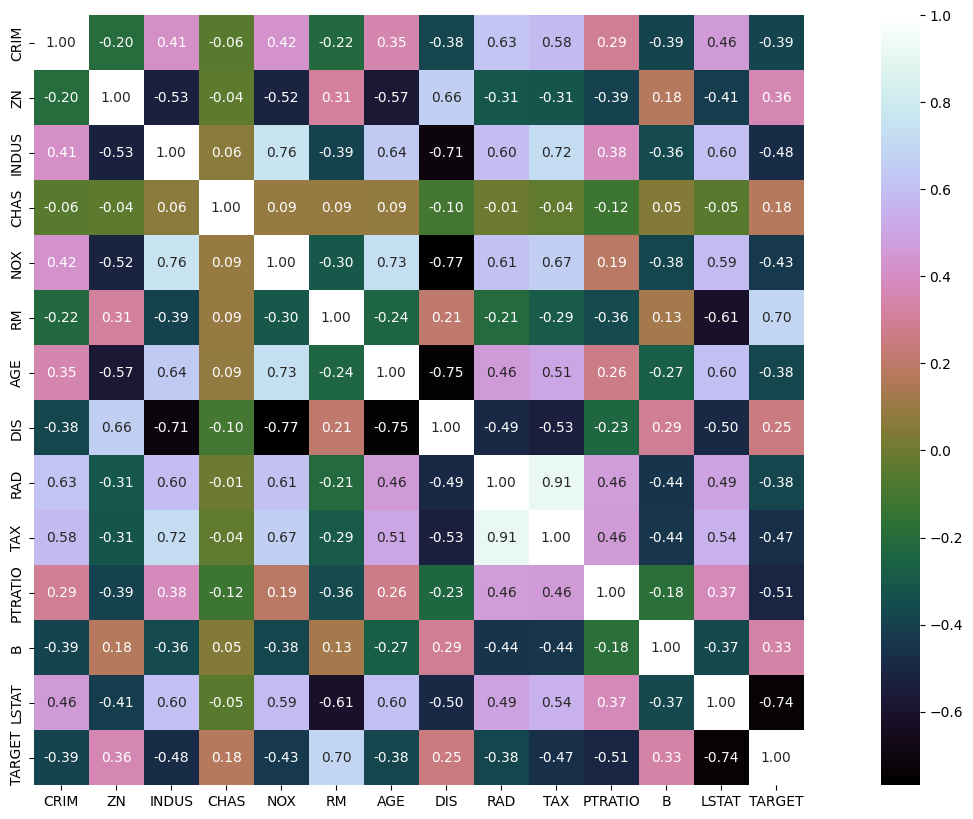

In [6]:
#matriz de correlacion
corr_mat=boston_df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix',fmt='.2f')
plt.show()

Apliquemos el modelo de regresión lineal multiple con **sklearn**

In [7]:
# datos para la regresion lineal simple
X = boston_df.drop("TARGET",axis=1) 
Y = boston_df["TARGET"]

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# ajustar el modelo
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, Y_train) # ajustando el modelo

# prediciones
Y_predict = model_rl.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [9]:
from sklearn.metrics import r2_score

# ejemplo: boston df
df_temp = pd.DataFrame(
    {
        'y':Y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = regression_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(Y_test, model_rl.predict(X_test)),4)

print('\nMetricas para el regresor CRIM:')
df_metrics


Metricas para el regresor CRIM:


,mae,mse,rmse,mape,smape,r2
0,3.113,18.4954,4.3006,16.036,0.2764,0.7789


Cuando se aplica el modelo de regresión lineal con todas las variables regresoras, las métricas disminuyen considerablemente, lo implica una mejora en el modelo 

Un problema que se tiene, a diferencia de la regresión lineal simple,es que no se puede ver gráficamente la calidad del ajuste, por lo que solo se puede confiar en las métricas calculadas. Además, se dejan las siguientes preguntas:

* ¿ Entre más regresores, mejor será el modelo de regresión lineal?
* ¿ Qué se debe tener en cuenta antes de agregar otro variable regresora al modelo de regresión lineal ?
* ¿ Qué sucede si se tienen outliers ?
* ¿ Existen otros modelos mejor que la regresión lineal ?

Ya se han discutido algunos de estos puntos, por lo que la atención estará en abordar otros modelos.

## Otros modelos de Regresión


Existen varios modelos de regresión, sin embargo, la intepretación de sus parámetros y el análisis de confiabilidad no es tan directo como los modelos de regresión lineal. Por este motivo, la atención estará centrada en la predicción más que en la confiabilidad como tal del modelo.

###  Modelos lineales 


Existen varios modelos lineales que podemos trabajar en sklearn (ver [referencia](https://scikit-learn.org/stable/modules/linear_model.html)), los cualeas podemos utilizar e ir comparando unos con otros.

De lo modelos lineales, destacamos los siguientes:

* [regresión lineal clásica](https://en.wikipedia.org/wiki/Linear_regression): regresión clásica por mínimos cudrados.
$$(P)\ \min \sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2   $$
* [lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)): se ocupa cuando tenemos un gran número de regresores y queremos que disminuya el problema de colinealidad (es decir, estimar como cero los parámetros poco relevantes).
$$(P)\ \min \sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2 + \lambda \sum_{i=1}^n |\beta_{i}| $$
* [ridge](https://en.wikipedia.org/wiki/Tikhonov_regularization): también sirve para disminuir el problema de colinealidad, y además trata de que los coeficientes sean más rocuesto bajo outliers.
$$(P)\ \min \sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2  + \lambda \sum_{i=1}^n \beta_{i}^2 $$


Dado que en sklearn, la forma de entrenar, estimar y predecir modelos de regresión siguen una misma estructura, para fectos prácticos, definimos una rutina para estimar las distintas métricas de la siguiente manera:

### **Bayesian Regression**

En estadística, la [regresión lineal bayesiana](https://en.wikipedia.org/wiki/Bayesian_linear_regression) es un enfoque de regresión lineal en el que el análisis estadístico se realiza dentro del contexto de la inferencia bayesiana. Cuando el modelo de regresión tiene errores que tienen una distribución normal, y si se asume una forma particular de distribución previa, los resultados explícitos están disponibles para las distribuciones de probabilidad posteriores de los parámetros del modelo.

<img src="https://drive.google.com/uc?export=view&id=1MIx5D5h3t7jHiTlivGyRlAOCs68Iq-mC" width = "400" align="center"/>




### k-vecinos más cercanos  **Knn**

El método de los [$k$ vecinos más cercanos](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (en inglés, k-nearest neighbors, abreviado $knn$) es un método de clasificación supervisada (Aprendizaje, estimación basada en un conjunto de entrenamiento y prototipos) que sirve para estimar la función de densidad $F(x/C_j)$ de las predictoras $x$ por cada clase  $C_{j}$.

Este es un método de clasificación no paramétrico, que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento $x$ pertenezca a la clase $C_j$ a partir de la información proporcionada por el conjunto de prototipos. En el proceso de aprendizaje no se hace ninguna suposición acerca de la distribución de las variables predictoras.

En el reconocimiento de patrones, el algoritmo $knn$ es usado como método de clasificación de objetos (elementos) basado en un entrenamiento mediante ejemplos cercanos en el espacio de los elementos. $knn$ es un tipo de aprendizaje vago (lazy learning), donde la función se aproxima solo localmente y todo el cómputo es diferido a la clasificación. La normalización de datos puede mejorar considerablemente la exactitud del algoritmo $knn$.

<img src="https://drive.google.com/uc?export=view&id=16EtU5xwyWX-GvpNvn2wWixZ3JN0h43ss" width = "300" align="center"/>




### **Decision Tree Regressor**

Un [árbol de decisión](https://en.wikipedia.org/wiki/Decision_tree) es un modelo de predicción utilizado en diversos ámbitos que van desde la inteligencia artificial hasta la Economía. Dado un conjunto de datos se fabrican diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.


<img src="https://drive.google.com/uc?export=view&id=1q-QwNEw3b4SqL3AS4Yz26_o5lwvxPYvA" width = "500" align="center"/>

Vamos a explicar cómo se construye un árbol de decisión. Para ello, vamos a hacer hincapié en varios aspectos


#### Elementos

Los árboles de decisión están formados por nodos, vectores de números, flechas y etiquetas.

* Cada nodo se puede definir como el momento en el que se ha de tomar una decisión de entre varias posibles, lo que va haciendo que a medida que aumenta el número de nodos aumente el número de posibles finales a los que puede llegar el individuo. Esto hace que un árbol con muchos nodos sea complicado de dibujar a mano y de analizar debido a la existencia de numerosos caminos que se pueden seguir.
* Los vectores de números serían la solución final a la que se llega en función de las diversas posibilidades que se tienen, dan las utilidades en esa solución.
* Las flechas son las uniones entre un nodo y otro y representan cada acción distinta.
* Las etiquetas se encuentran en cada nodo y cada flecha y dan nombre a cada acción.


#### Conceptos
Cuando tratemos en el desarrollo de árboles utilizaremos frecuentemente estos conceptos:

* Costo. Se refiere a dos conceptos diferentes: el costo de medición para determinar el valor de una determinada propiedad (atributo) exhibida por el objeto y el costo de clasificación errónea al decidir que el objeto pertenece a la clase $X$ cuando su clase real es $Y$.
* Sobreajuste (Overfitting). Se produce cuando los datos de entrenamiento son pocos o contienen incoherencias. Al tomar un espacio de hipótesis $H$, se dice que una hipótesis $h ∈ H$ sobreajusta un conjunto de entrenamiento $C$ si existe alguna hipótesis alternativa $h' ∈ H$ tal que $h$ clasifica mejor que $h'$ los elementos del conjunto de entrenamiento, pero $h'$ clasifica mejor que h el conjunto completo de posibles instancias.
* Poda (Prunning). La poda consiste en eliminar una rama de un nodo transformándolo en una hoja (terminal), asignándole la clasificación más común de los ejemplos de entrenamiento considerados en ese nodo.
* La validación cruzada. Es el proceso de construir un árbol con la mayoría de los datos y luego usar la parte restante de los datos para probar la precisión del árbol.


#### Reglas
En los árboles de decisión se tiene que cumplir una serie de reglas.

   1. Al comienzo del juego se da un nodo inicial que no es apuntado por ninguna flecha, es el único del juego con esta característica.
   2. El resto de los nodos del juego son apuntados por una única flecha.
   3. De esto se deduce que hay un único camino para llegar del nodo inicial a cada uno de los nodos del juego. No hay varias formas de llegar a la misma solución final, las decisiones son excluyentes.
   
   
En los árboles de decisiones las decisiones que se eligen son lineales, a medida que vas seleccionando entre varias opciones se van cerrando otras, lo que implica normalmente que no hay marcha atrás. En general se podría decir que las normas siguen una forma condicional: 

$$\textrm{Opción }1->\textrm{opción }2->\textrm{opción }3->\textrm{Resultado Final }X$$

Estas reglas suelen ir implícitas en el conjunto de datos a raíz del cual se construye el árbol de decisión.

### **SVM**

Las [máquinas de vectores de soporte](https://en.wikipedia.org/wiki/Support-vector_machine)  (del inglés Support Vector Machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado desarrollados por Vladimir Vapnik y su equipo en los laboratorios AT&T.

Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase.

Más formalmente, una SVM construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad muy alta (o incluso infinita) que puede ser utilizado en problemas de clasificación o regresión. Una buena separación entre las clases permitirá una clasificación correcta.

<img src="https://drive.google.com/uc?export=view&id=1XG2dCNaRFQral3XPLfCDi4vqK1TliPk9" width = "300" align="center"/>


#### Idea Básica

Dado un conjunto de puntos, subconjunto de un conjunto mayor (espacio), en el que cada uno de ellos pertenece a una de dos posibles categorías, un algoritmo basado en SVM construye un modelo capaz de predecir si un punto nuevo (cuya categoría desconocemos) pertenece a una categoría o a la otra.

Como en la mayoría de los métodos de clasificación supervisada, los datos de entrada (los puntos) son vistos como un vector $p-dimensional$ (una lista ordenada de $p$ números).

La SVM busca un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, que eventualmente han podido ser previamente proyectados a un espacio de dimensionalidad superior.

En ese concepto de "separación óptima" es donde reside la característica fundamental de las SVM: este tipo de algoritmos buscan el hiperplano que tenga la máxima distancia (margen) con los puntos que estén más cerca de él mismo. Por eso también a veces se les conoce a las SVM como clasificadores de margen máximo. De esta forma, los puntos del vector que son etiquetados con una categoría estarán a un lado del hiperplano y los casos que se encuentren en la otra categoría estarán al otro lado.

Los algoritmos SVM pertenecen a la familia de los clasificadores lineales. También pueden ser considerados un caso especial de la regularización de Tikhonov.

En la literatura de las SVM, se llama atributo a la variable predictora y característica a un atributo transformado que es usado para definir el hiperplano. La elección de la representación más adecuada del universo estudiado, se realiza mediante un proceso denominado selección de características.

Al vector formado por los puntos más cercanos al hiperplano se le llama vector de soporte.

Los modelos basados en SVM están estrechamente relacionados con las redes neuronales. Usando una función kernel, resultan un método de entrenamiento alternativo para clasificadores polinomiales, funciones de base radial y perceptrón multicapa.

<img src="https://drive.google.com/uc?export=view&id=1WMi_D2i-qor5MadISaNPiFCUeMCTsFoH" width = "400" align="center"/>



## Aplicando varios modelos al mismo tiempo

Veremos el performance de los distintos modelos estudiados. 

In [10]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import neighbors

In [11]:
class SklearnRegressionModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = regression_metrics(df_temp)
        df_metrics['r2'] =  round(r2_score(df_temp['y'],df_temp['yhat']),4)

        df_metrics['model'] = self.name_model
        
        return df_metrics

    def parameters(self,X,y,test_size):
        model_fit = self.fit_model(X,y,test_size)
        
        list_betas = [
             ('beta_0',model_fit.intercept_)
                ]
            
        betas = model_fit.coef_
        
        for num, beta in enumerate(betas):
            name_beta = f'beta_{num+1}'
            list_betas.append((name_beta,round(beta,2)))

        result = pd.DataFrame(
            columns = ['coef','value'],
            data = list_betas
        )
        
        result['model'] = self.name_model
        return result 

In [12]:
# boston dataframe
X = boston_df.drop("TARGET",axis=1) 
Y = boston_df["TARGET"]

In [13]:
# models
reg_lineal = linear_model.LinearRegression()
reg_ridge = linear_model.Ridge(alpha=.5)
reg_lasso = linear_model.Lasso(alpha=0.1)

reg_knn = neighbors.KNeighborsRegressor(5,weights='uniform')
reg_bayesian = linear_model.BayesianRidge()
reg_tree = tree.DecisionTreeRegressor(max_depth=5)
reg_svm = svm.SVR(kernel='linear')


list_models =[
    [reg_lineal,'lineal'],
    [reg_ridge,'ridge'],
    [reg_lasso,'lasso'],
    [reg_knn,'knn'],
    [reg_bayesian,'bayesian'],
    [reg_tree,'decision_tree'],
    [reg_svm,'svm'],
]

In [14]:
frames_metrics = []
frames_coef = []

for model,name_models in list_models:
    fit_model =  SklearnRegressionModels( model,name_models)
    frames_metrics.append(fit_model.metrics(X,Y,0.2))
    if name_models in ['lineal','ridge','lasso']:
        frames_coef.append(fit_model.parameters(X,Y,0.2))

In [15]:
# juntar resultados: metricas
pd.concat(frames_metrics).sort_values('rmse')

,mae,mse,rmse,mape,smape,r2,model
0,2.6062,20.3563,4.5118,15.0760,0.2620,0.7224,decision_tree
0,3.1891,24.2911,4.9286,16.8664,0.2886,0.6688,lineal
0,3.1493,24.3776,4.9374,16.6837,0.2860,0.6676,ridge
0,3.1251,24.6471,4.9646,16.5449,0.2839,0.6639,bayesian
0,3.1452,25.1556,5.0155,16.7519,0.2870,0.6570,lasso
0,3.6639,25.8601,5.0853,18.8859,0.3177,0.6474,knn
0,3.1404,29.4359,5.4255,16.7713,0.2873,0.5986,svm


Basados en los distintos estadísticos, el mejor modelo corresponde al modelo de **decision_tree**. Por otro lado, podemos analizar los coeficientes de los modelos líneales ordinarios,Ridge y Lasso.

In [16]:
# juntar resultados: coeficientes
pd.concat(frames_coef)

,coef,value,model
0,beta_0,30.246751,lineal
1,beta_1,-0.110000,lineal
2,beta_2,0.030000,lineal
3,beta_3,0.040000,lineal
4,beta_4,2.780000,lineal
5,beta_5,-17.200000,lineal
6,beta_6,4.440000,lineal
7,beta_7,-0.010000,lineal
8,beta_8,-1.450000,lineal
9,beta_9,0.260000,lineal


Al comparar los resultados entre ambos modelos, se observa que hay coeficientes en la regresión Lasso que se van a cero directamente, pudiendo eliminar estas variables del modelo. Por otro lado, queda como tarea para el lector, hacer una eliminación de outliers del modelo y probar estos modelos lineales para ver si existe algún tipo de diferencia.

## Conclusión

* Existen distintos modelos de regresión lineal: normal, Ridge y Lasso. Cada uno con sus respectivs ventajas y desventajas.
* Existen otros tipos de modelos de regresión (bayesiano, knn, arboles de decisión, svm, entre otros). Por ahora, nos interesa saber como funcionan, para poder configurar los hiperparámetros de los modelos ocupados en python (principalmente de la librería *sklearn*).
* En el mundo del machine learning se estará interesado más en predecir con el menor error posible (siempre tomando como referencia alguna de las métricas mencionadas) que hacer un análisis exhaustivo de la confiabilidad del modelo. Siendo este el caso y si la capacidad computacional lo permite, lo ideal es probar varios modelos al mismo tiempo y poder discriminar bajo un determinado criterio (a menudo el **error cuadrático medio (rmse)** o el **mape**).

## Referencias

1. [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html)